In [156]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [157]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [158]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect,func

In [159]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [160]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [161]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [162]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [163]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [164]:
# view table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [167]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

Text(0, 0.5, 'Inches')

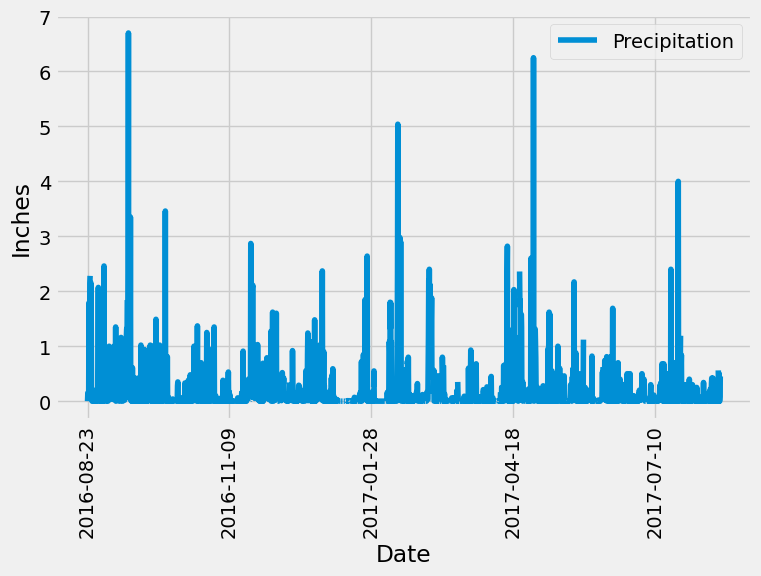

In [168]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
latest_date = session.query(func.max(Measurement.date)).scalar()
latest_date = dt.datetime.strptime(latest_date,'%Y-%m-%d')
# Calculate the date one year from the last date in data set.
one_year_ago = latest_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp)\
    .filter(Measurement.date >= '2016-08-23').filter(Measurement.date <= '2017-08-23')\
    .order_by(Measurement.date).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_data, columns=['Date','Precipitation'])
precipitation_df.set_index('Date', inplace=True)
# Sort the dataframe by date
precipitation_df.sort_index(inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(kind = 'line',
                    figsize=(8,5),
                    rot='vertical')
plt.xlabel('Date')
plt.ylabel('Inches')

In [169]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df['Precipitation'].describe()


count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [170]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.name)).all()
print(total_stations)


[(9,)]


In [171]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Station.station, func.count(Measurement.station)).\
    filter(Station.station == Measurement.station).\
    group_by(Station.station).\
    order_by(func.count(Measurement.station).desc()).all()
    
for station in active_stations:
    print(f'{station}')

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [172]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperatures = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

print(temperatures)
    

[(54.0, 85.0, 71.66378066378067)]


Text(0, 0.5, 'Frequency')

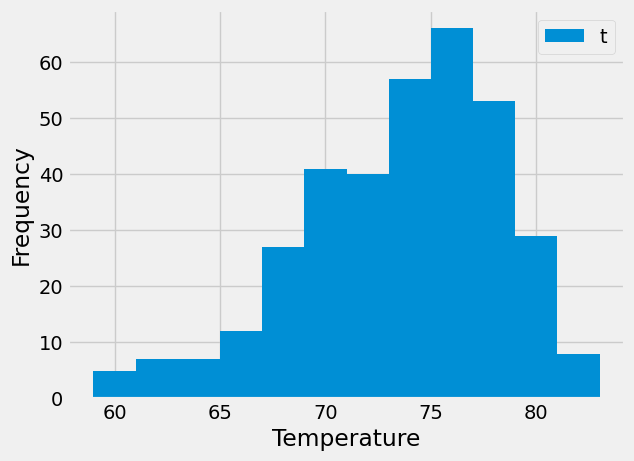

In [173]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
twelve_month_temps = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= '2016-08-23').all()
    

# convert to dataframe
temperature_df = pd.DataFrame(twelve_month_temps)

# plt.figure(figsize=(10,8))
plt.hist(temperature_df, bins=12,rwidth=2.0)
plt.legend('tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')


# Close Session

In [174]:
# Close Session
session.close()